In [9]:
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
base_case_file_path = r'../output_data/BaseCase.csv'
base_case = pd.read_csv(base_case_file_path)
base_case

,RunId,iteration,Step,number_of_households,number_of_steps,flood_map_choice,network,TotalAdaptedHouseholds,TotalActualDamage,TotalExpectedDamage,TotalAdaptationCosts,TotalCostsOfSubsidies,AverageDamagePerPoorHousehold,AverageDamagePerMiddleClassHousehold,AverageDamagePerRichHousehold,AverageIncomeToDamagePoorHousehold,AverageIncomeToDamageMiddleClassHousehold,AverageIncomeToDamageRichHousehold
0,0,0,5,1000,80,harvey,watts_strogatz,458,4.980319e+07,5.257834e+07,1606490,0,30163.884418,50316.000633,99065.103324,6.072956,1.745628,1.118147
1,1,1,10,1000,80,harvey,watts_strogatz,581,5.153366e+07,5.506897e+07,2082020,0,25398.304500,51379.915903,116041.000751,4.937528,1.723087,1.298967
2,2,2,30,1000,80,harvey,watts_strogatz,556,4.858503e+07,5.153138e+07,3142695,0,27932.290755,45779.713636,119852.373231,5.587524,1.570722,1.389872
3,5,5,20,1000,80,harvey,watts_strogatz,605,4.754899e+07,5.084863e+07,2085580,0,21832.576645,48027.259164,107836.367458,4.261472,1.672048,1.202744
4,7,7,10,1000,80,harvey,watts_strogatz,583,5.129012e+07,5.473537e+07,1989995,0,27942.080371,52908.947570,107603.304759,5.617498,1.774873,1.215407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,92,92,77,1000,80,harvey,watts_strogatz,646,4.218366e+07,4.463374e+07,5333000,0,23516.068246,40391.535428,111303.511150,4.700294,1.368376,1.275265
96,99,99,21,1000,80,harvey,watts_strogatz,565,5.219081e+07,5.488784e+07,2287965,0,24399.589871,47125.727704,149588.278107,4.961824,1.619103,1.720515
97,96,96,63,1000,80,harvey,watts_strogatz,575,5.137283e+07,5.442344e+07,3771755,0,24806.732965,49651.821630,126803.843428,4.888154,1.690285,1.486465
98,97,97,39,1000,80,harvey,watts_strogatz,531,4.987396e+07,5.260126e+07,3294955,0,22959.409908,47077.247648,139433.239991,4.607301,1.579300,1.552052


Text(0.5, 1.0, 'Average Damage to Average Income ratio for different income labels')

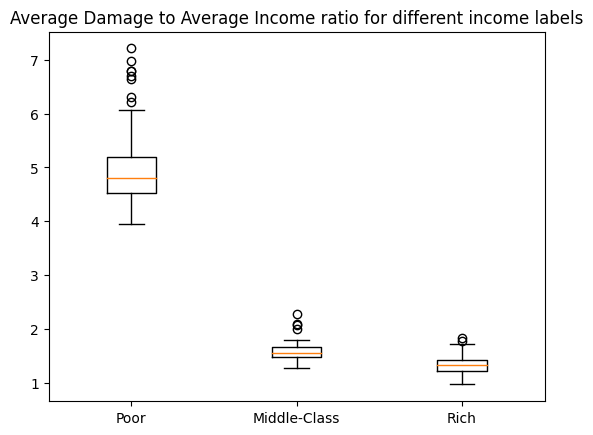

In [3]:
boxplot_base_case_ratio = plt.boxplot([base_case['AverageIncomeToDamagePoorHousehold'], base_case['AverageIncomeToDamageMiddleClassHousehold'], base_case['AverageIncomeToDamageRichHousehold']], 
            labels=['Poor', 'Middle-Class', 'Rich'])

plt.title('Average Damage to Average Income ratio for different income labels')


Text(0.5, 1.0, 'Average Damage per agent for each income label')

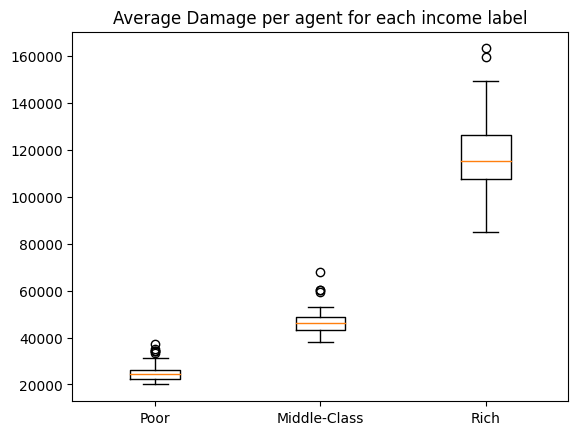

In [4]:
boxplot_base_case_average_per_label = plt.boxplot([base_case['AverageDamagePerPoorHousehold'], base_case['AverageDamagePerMiddleClassHousehold'], base_case['AverageDamagePerRichHousehold']], 
            labels=['Poor', 'Middle-Class', 'Rich'])
plt.title('Average Damage per agent for each income label') 

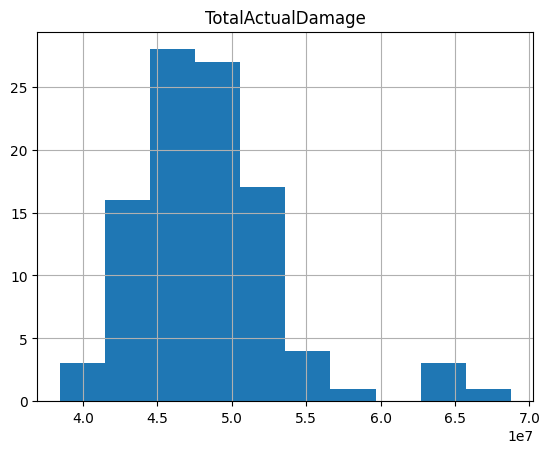

In [5]:
histogram_actual_damage = base_case.hist('TotalActualDamage')

    RunId  iteration  Step  number_of_households  number_of_steps  \
0       0          0     5                  1000               80   
1       1          1    10                  1000               80   
2       2          2    30                  1000               80   
3       5          5    20                  1000               80   
4       7          7    10                  1000               80   
..    ...        ...   ...                   ...              ...   
95     92         92    77                  1000               80   
96     99         99    21                  1000               80   
97     96         96    63                  1000               80   
98     97         97    39                  1000               80   
99     98         98    50                  1000               80   

   flood_map_choice         network  TotalAdaptedHouseholds  \
0            harvey  watts_strogatz                     458   
1            harvey  watts_strogatz          

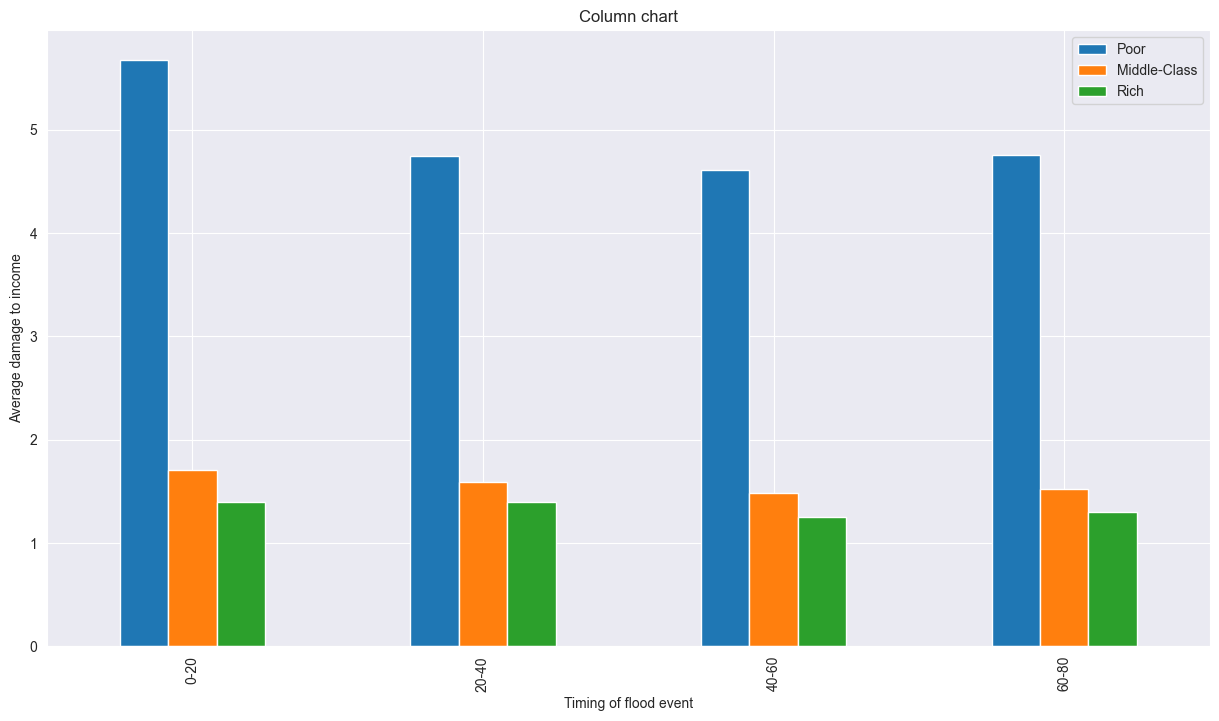

In [14]:
# Sample DataFrame (replace this with your actual DataFrame)


plotdata = pd.DataFrame({

    "Poor":base_case['AverageIncomeToDamagePoorHousehold'],

    "Middle-Class":base_case['AverageIncomeToDamageMiddleClassHousehold'],

    "Rich":base_case['AverageIncomeToDamageRichHousehold']})

# Define the intervals for clustering and provide labeling. 
intervals = [0, 20, 40, 60, 80]
custom_labels = ['0-20', '20-40', '40-60', '60-80']

# Create a new column representing the clusters
base_case['Cluster'] = pd.cut(base_case['Step'], bins=intervals, labels=custom_labels)

# Create the plotdata DataFrame - we have not used this, because afterwards we chose for boxplots. But it was a way to experiment with the data.
plotdata = pd.DataFrame({
    "Poor": base_case.groupby('Cluster')['AverageIncomeToDamagePoorHousehold'].mean(),
    "Middle-Class": base_case.groupby('Cluster')['AverageIncomeToDamageMiddleClassHousehold'].mean(),
    "Rich": base_case.groupby('Cluster')['AverageIncomeToDamageRichHousehold'].mean()
})

# Display the result
print(base_case)
plotdata.plot(kind="bar", figsize=(15, 8))

plt.title("Column chart")
plt.xlabel("Timing of flood event")
plt.ylabel("Average damage to income")

plt.show()

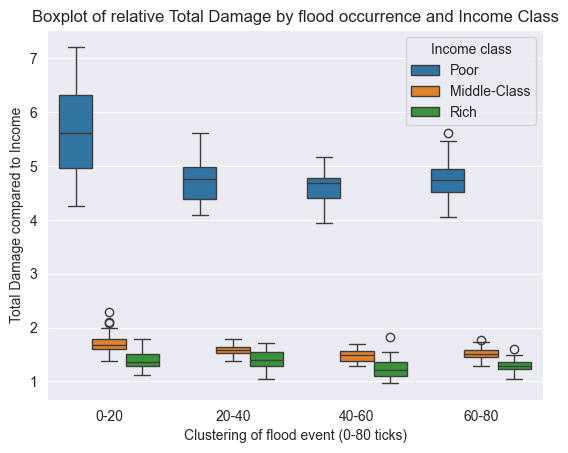

In [25]:
import seaborn as sns

# Assuming 'data' is your DataFrame with damage columns for each income class
# Replace this line with your actual DataFrame
data = pd.DataFrame({
    'Flood event': base_case['Cluster'],
    'Poor': base_case['AverageIncomeToDamagePoorHousehold'],
    'Middle-Class': base_case['AverageIncomeToDamageMiddleClassHousehold'],
    'Rich': base_case['AverageIncomeToDamageRichHousehold']
})

# Reshape the DataFrame to long format
melted_data = pd.melt(data, id_vars=['Flood event'], var_name='Income class', value_name='total_damage')

# Create the boxplot using Seaborn
sns.boxplot(x=melted_data['Flood event'], y=melted_data['total_damage'], hue=melted_data['Income class'])

plt.title('Boxplot of relative Total Damage by flood occurrence and Income Class')
plt.xlabel('Clustering of flood event (0-80 ticks)')
plt.ylabel('Total Damage compared to Income')

output_path_basecase = r'../result_figures/Boxplot_BaseCase.png'
plt.savefig(output_path_basecase)
plt.show()

